In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [21]:
def corr_mat(mat, threshold):
    esti_corr_mat = mat.copy()
    esti_corr_mat[esti_corr_mat<=threshold] = 0
    esti_corr_mat[esti_corr_mat>threshold] = 1
    
    corr_idx_list = []
    for i in range(esti_corr_mat.shape[0]):
        for j in range(esti_corr_mat.shape[1]):
            if esti_corr_mat[i,j] == 1 and abs(i-j) > 100 and i < j:
                corr_idx_list.append([i+1,j+1])
            
    plt.figure(figsize=(15,15))
    plt.imshow(esti_corr_mat, cmap = 'hot')
    plt.show()
    
    return corr_idx_list

def showCorrImg(corr_idx_list):
    for corr in corr_idx_list:

        img_i_path = ('/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % corr[0])
        img_j_path = ('/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg' % corr[1])

        img_i = mpimg.imread(img_i_path)
        img_j = mpimg.imread(img_j_path)

        merge_img = np.hstack([img_i, img_j])
        plt.figure(figsize=(15,15))
        plt.imshow(merge_img)
        plt.show()

def calPrecision(corr_idx_list):
    true_cnt = 0
    for corr in real_corr_list:
        if (corr in corr_idx_list):
            true_cnt += 1
    print(true_cnt/len(corr_idx_list),'/ true_positive:', true_cnt,'/ true_positive+false_positive:', len(corr_idx_list))

In [19]:
# real correspondence list  (dist: 0 ~ 0.5)
real_corr_list= [[352, 1400], [353, 1401], [390, 1448], [391, 1449], [394, 1452], [395, 1453], [400, 1460], [540, 1618], [543, 1619], [544, 1620], [749, 1819], [940, 2018], [941, 2019], [942, 2020], [943, 2021], [944, 2022], [945, 2023], [946, 2024], [957, 2035], [959, 2037], [960, 2038], [961, 2039], [962, 2040], [963, 2041], [986, 2064], [987, 2065], [988, 2066], [989, 2067], [990, 2068], [991, 2069], [992, 2070], [993, 2071], [994, 2072], [995, 2073], [996, 2074], [1004, 2082], [1148, 2222], [1225, 2303], [1226, 2304], [1231, 2311], [1275, 2355], [1287, 2365], [1289, 2367], [1290, 2368], [1302, 2378], [1303, 2381]]

# Proposed Method Result

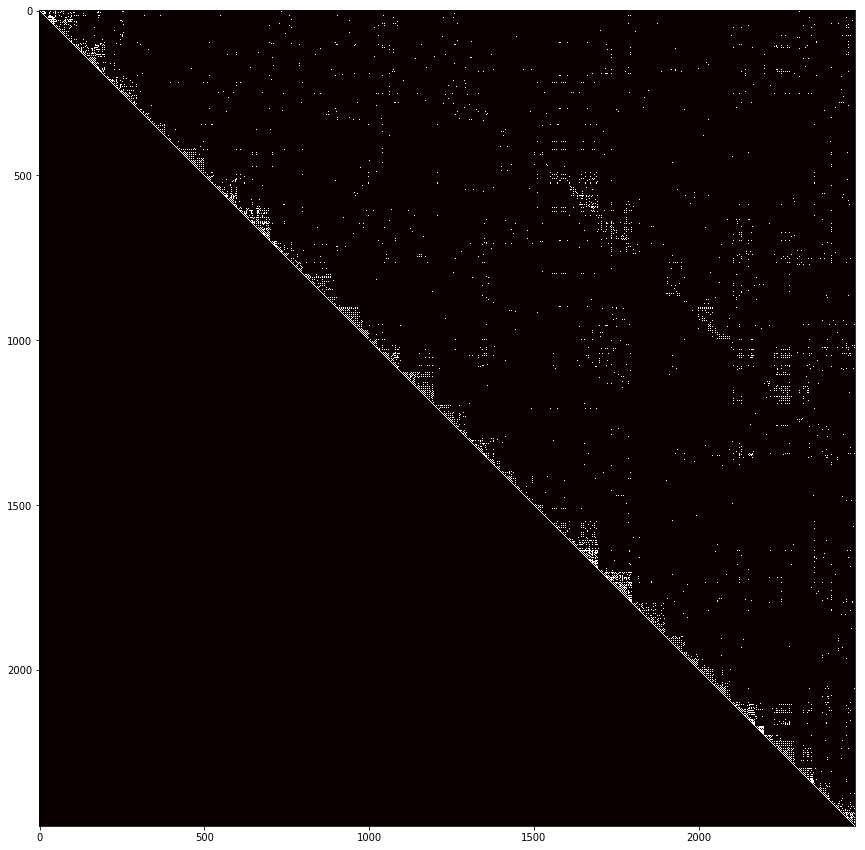

0.0010743567995476393 / true_positive: 19 / true_positive+false_positive: 17685


In [22]:
# prop_esti_corr_mat = np.matrix(np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt'))
prop_corr_idx_list = corr_mat(prop_esti_corr_mat, 0.2)
calPrecision(prop_corr_idx_list)

# SURF Result

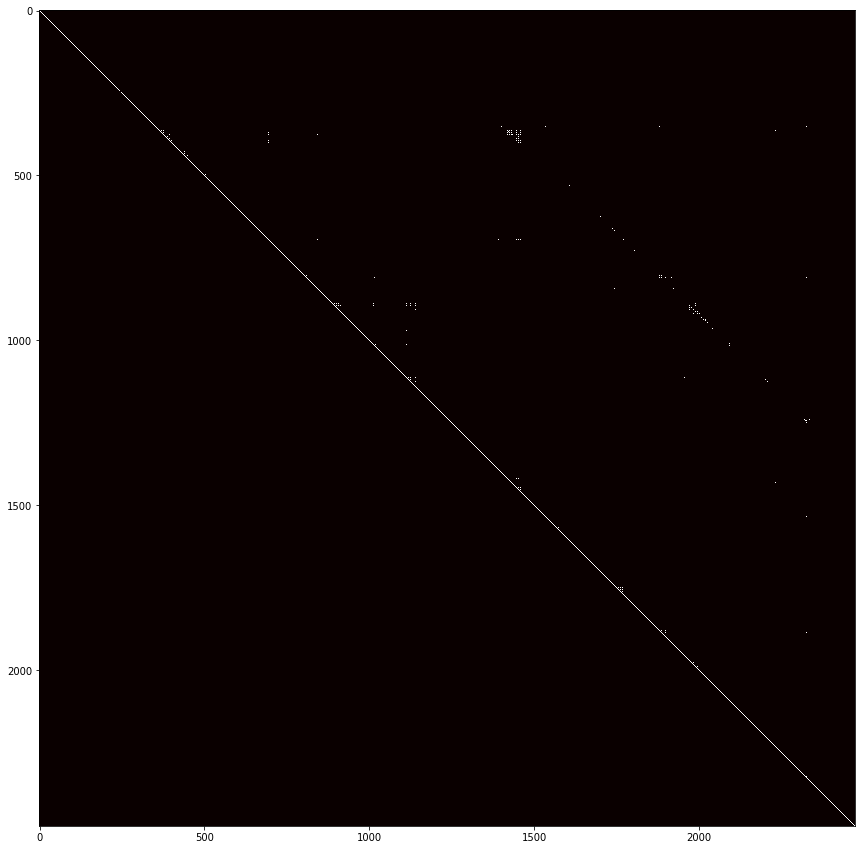

0.013002364066193853 / true_positive: 11 / true_positive+false_positive: 846


In [23]:
surf_esti_corr_mat = np.matrix(np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/SURF_Result.txt'))
surf_corr_idx_list = corr_mat(surf_esti_corr_mat, 0.05)
calPrecision(surf_corr_idx_list)

# ORB Result

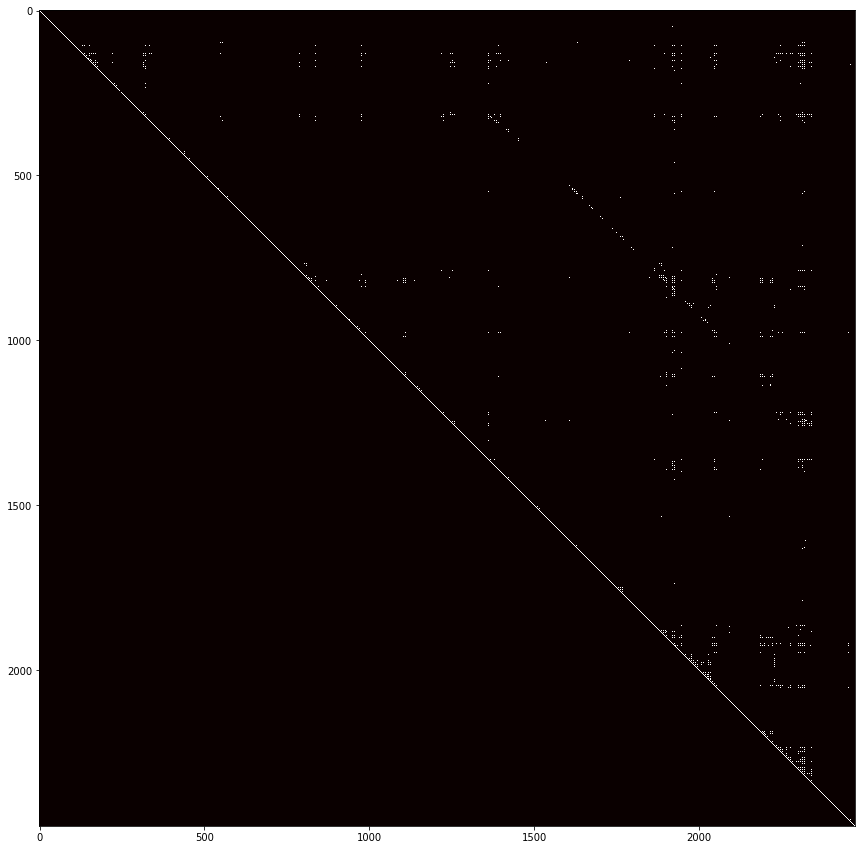

0.0029043383554184063 / true_positive: 16 / true_positive+false_positive: 5509


In [25]:
orb_esti_corr_mat = np.matrix(np.loadtxt('/home/dongwonshin/Desktop/DBow3/build/orb_corr_matrix.txt'))
orb_corr_idx_list = corr_mat(orb_esti_corr_mat, 0.05)
calPrecision(orb_corr_idx_list)

# Brisk Result

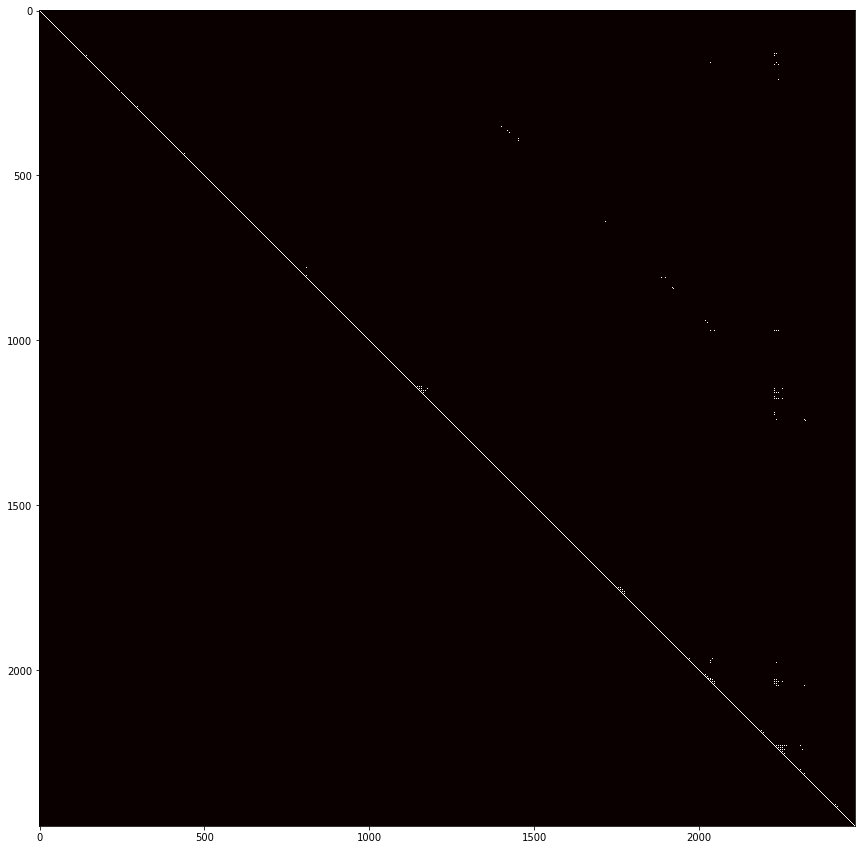

0.026905829596412557 / true_positive: 12 / true_positive+false_positive: 446


In [29]:
brisk_esti_corr_mat = np.matrix(np.loadtxt('/home/dongwonshin/Desktop/DBow3/build/brisk_corr_matrix.txt'))
brisk_corr_idx_list = corr_mat(brisk_esti_corr_mat, 0.05)
calPrecision(brisk_corr_idx_list)